<a href="https://colab.research.google.com/github/brindha-ux/AB-testing/blob/main/Welcome_to_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df = pd.read_csv("/content/2002-2013.csv")
df.head()

,State/UT,2002 IT Act,2002 IPC Section,2003 IT Act,2003 IPC Section,2004 IT Act,2004 IPC Section,2005 IT Act,2005 IPC Section,2006 IT Act,...,2009 IT Act,2009 IPC Section,2010 IT Act,2010 IPC Section,2011 IT Act,2011 IPC Section,2012 IT Act,2012 IPC Section,2013 IT Act,2013 IPC Section
0,ANDHRA PRADESH,8,253,3,218,8,93,14,68,14,...,30,8,105,66,349,23,635,16,635,16
1,ARUNACHAL PRADESH,0,0,0,0,0,0,0,0,0,...,1,0,3,0,13,1,10,0,10,0
2,ASSAM,2,0,0,0,0,0,1,0,1,...,2,2,18,0,31,0,154,0,154,0
3,BIHAR,0,0,0,0,0,0,0,0,0,...,0,0,2,0,25,13,23,116,23,116
4,CHHATTISGARH,0,0,0,0,0,0,18,28,0,...,4,46,4,46,2,76,91,10,91,10


In [4]:
for i in range(2002 , 2014):
    df[str(i)] = df[str(i)+" IT Act"] + df[str(i)+" IPC Section"]
    df.drop(columns=[str(i)+" IT Act", str(i)+" IPC Section"] , inplace=True)

# The name of the states has been modified refer to geojson data to get the name in accordance to geojson file
# Replace withh the new name of the state to match consistency
df['State/UT'] = df['State/UT'].replace(['ORISSA', 'UTTARANCHAL', 'PONDICHERRY'] , ['ODISHA' ,'UTTARAKHAND', 'PUDUCHERRY'])
df.set_index("State/UT" , inplace=True)
df.head()

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
State/UT,,,,,,,,,,,,
ANDHRA PRADESH,261,221,101,82,82,69,103,38,171,372,651,651
ARUNACHAL PRADESH,0,0,0,0,0,0,0,1,3,14,10,10
ASSAM,2,0,0,1,1,0,2,4,18,31,154,154
BIHAR,0,0,0,0,0,0,0,0,2,38,139,139
CHHATTISGARH,0,0,0,46,28,57,20,50,50,78,101,101


In [7]:
otherdf = pd.read_csv("/content/2014-2017.csv")
otherdf.head()

,State/UT,2014 Total,2015 Total,2016 Total,2017 Total
0,Andhra Pradesh,282,536,616,931
1,Arunachal Pradesh,18,6,4,1
2,Assam,379,483,696,1120
3,Bihar,114,242,309,433
4,Chhattisgarh,123,103,90,171


In [8]:
otherdf.rename(columns={"2014 Total":"2014" , "2015 Total": "2015" , "2016 Total":"2016" , "2017 Total":"2017"} , inplace=True)
otherdf['State/UT'] = otherdf['State/UT'].apply(lambda a : str.upper(a))
otherdf['State/UT']=otherdf['State/UT'].replace(['DELHI UT','D&N HAVELI'] , ['DELHI' , 'D & N HAVELI'])
otherdf = otherdf.set_index("State/UT")
# join df and otherdf (i.e data from 2014-2017)
df = otherdf.join(df)

df.head()

,2014,2015,2016,2017,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
State/UT,,,,,,,,,,,,,,,,
ANDHRA PRADESH,282,536,616,931,261.0,221.0,101.0,82.0,82.0,69.0,103.0,38.0,171.0,372.0,651.0,651.0
ARUNACHAL PRADESH,18,6,4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,14.0,10.0,10.0
ASSAM,379,483,696,1120,2.0,0.0,0.0,1.0,1.0,0.0,2.0,4.0,18.0,31.0,154.0,154.0
BIHAR,114,242,309,433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,38.0,139.0,139.0
CHHATTISGARH,123,103,90,171,0.0,0.0,0.0,46.0,28.0,57.0,20.0,50.0,50.0,78.0,101.0,101.0


In [9]:
thirddf = pd.read_csv("/content/2018-2020.csv")
thirddf['State/UT'] = thirddf['State/UT'].apply(lambda a : str.upper(a))
thirddf['State/UT'] = thirddf['State/UT'].replace(['A&N ISLANDS' , 'D&N HAVELI AND'] , ['A & N ISLANDS' , 'D & N HAVELI'])
thirddf = thirddf.set_index("State/UT")
thirddf.head()

,2018,2019,2020
State/UT,,,
ANDHRA PRADESH,1207,1886,1899
ARUNACHAL PRADESH,7,8,30
ASSAM,2022,2231,3530
BIHAR,374,1050,1512
CHHATTISGARH,139,175,297


In [10]:
df = thirddf.join(df)

# write the data to csv file if needed
df.to_csv("CompleteData.csv")
df.head()

,2018,2019,2020,2014,2015,2016,2017,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
State/UT,,,,,,,,,,,,,,,,,,,
ANDHRA PRADESH,1207,1886,1899,282.0,536.0,616.0,931.0,261.0,221.0,101.0,82.0,82.0,69.0,103.0,38.0,171.0,372.0,651.0,651.0
ARUNACHAL PRADESH,7,8,30,18.0,6.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,14.0,10.0,10.0
ASSAM,2022,2231,3530,379.0,483.0,696.0,1120.0,2.0,0.0,0.0,1.0,1.0,0.0,2.0,4.0,18.0,31.0,154.0,154.0
BIHAR,374,1050,1512,114.0,242.0,309.0,433.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,38.0,139.0,139.0
CHHATTISGARH,139,175,297,123.0,103.0,90.0,171.0,0.0,0.0,0.0,46.0,28.0,57.0,20.0,50.0,50.0,78.0,101.0,101.0


In [11]:
df = df.fillna(0)
df.head(35)

,2018,2019,2020,2014,2015,2016,2017,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
State/UT,,,,,,,,,,,,,,,,,,,
ANDHRA PRADESH,1207,1886,1899,282.0,536.0,616.0,931.0,261.0,221.0,101.0,82.0,82.0,69.0,103.0,38.0,171.0,372.0,651.0,651.0
ARUNACHAL PRADESH,7,8,30,18.0,6.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,14.0,10.0,10.0
ASSAM,2022,2231,3530,379.0,483.0,696.0,1120.0,2.0,0.0,0.0,1.0,1.0,0.0,2.0,4.0,18.0,31.0,154.0,154.0
BIHAR,374,1050,1512,114.0,242.0,309.0,433.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,38.0,139.0,139.0
CHHATTISGARH,139,175,297,123.0,103.0,90.0,171.0,0.0,0.0,0.0,46.0,28.0,57.0,20.0,50.0,50.0,78.0,101.0,101.0
GOA,29,15,40,62.0,17.0,31.0,13.0,8.0,2.0,0.0,0.0,0.0,4.0,6.0,12.0,16.0,18.0,58.0,58.0
GUJARAT,702,784,1283,227.0,242.0,362.0,458.0,250.0,29.0,126.0,155.0,158.0,3.0,33.0,36.0,55.0,67.0,77.0,77.0
HARYANA,418,564,656,151.0,224.0,401.0,504.0,2.0,1.0,0.0,9.0,2.0,1.0,0.0,0.0,1.0,45.0,323.0,323.0
HIMACHAL PRADESH,69,76,98,38.0,50.0,31.0,56.0,99.0,87.0,0.0,0.0,0.0,0.0,6.0,6.0,17.0,12.0,28.0,28.0


In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [14]:
gdf = gpd.read_file("/content/states_india.geojson")
# change all the state and UTs name to uppercase
gdf['st_nm'] = gdf['st_nm'].apply(lambda a : str.upper(a))
gdf.head()

,cartodb_id,state_code,st_nm,geometry
0,1,0,TELENGANA,"MULTIPOLYGON (((78.34088 19.88362, 78.35133 19..."
1,2,35,ANDAMAN AND NICOBAR,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
2,3,28,ANDHRA PRADESH,"MULTIPOLYGON (((81.39375 16.3338, 81.39224 16...."
3,4,12,ARUNACHAL PRADESH,"MULTIPOLYGON (((96.16261 29.38078, 96.1686 29...."
4,5,18,ASSAM,"MULTIPOLYGON (((89.74323 26.30362, 89.7429 26...."


In [15]:
df = df.reset_index()
# rename the names to match the name in geojson file
df['State/UT'] = df['State/UT'].replace(['TELANGANA','A & N ISLANDS','JAMMU & KASHMIR','D & N HAVELI']
,['TELENGANA','ANDAMAN AND NICOBAR','JAMMU AND KASHMIR' , 'DADRA AND NAGAR HAVELI AND DAMAN AND DIU'])
# set state as index again
df.set_index("State/UT" , inplace=True)
df[df.index=='JAMMU AND KASHMIR'] = df[df.index=='JAMMU AND KASHMIR'].values+ df[df.index=='LADAKH '].values

In [16]:
gdf = gdf.set_index('st_nm')
gdf = gdf.join(df)

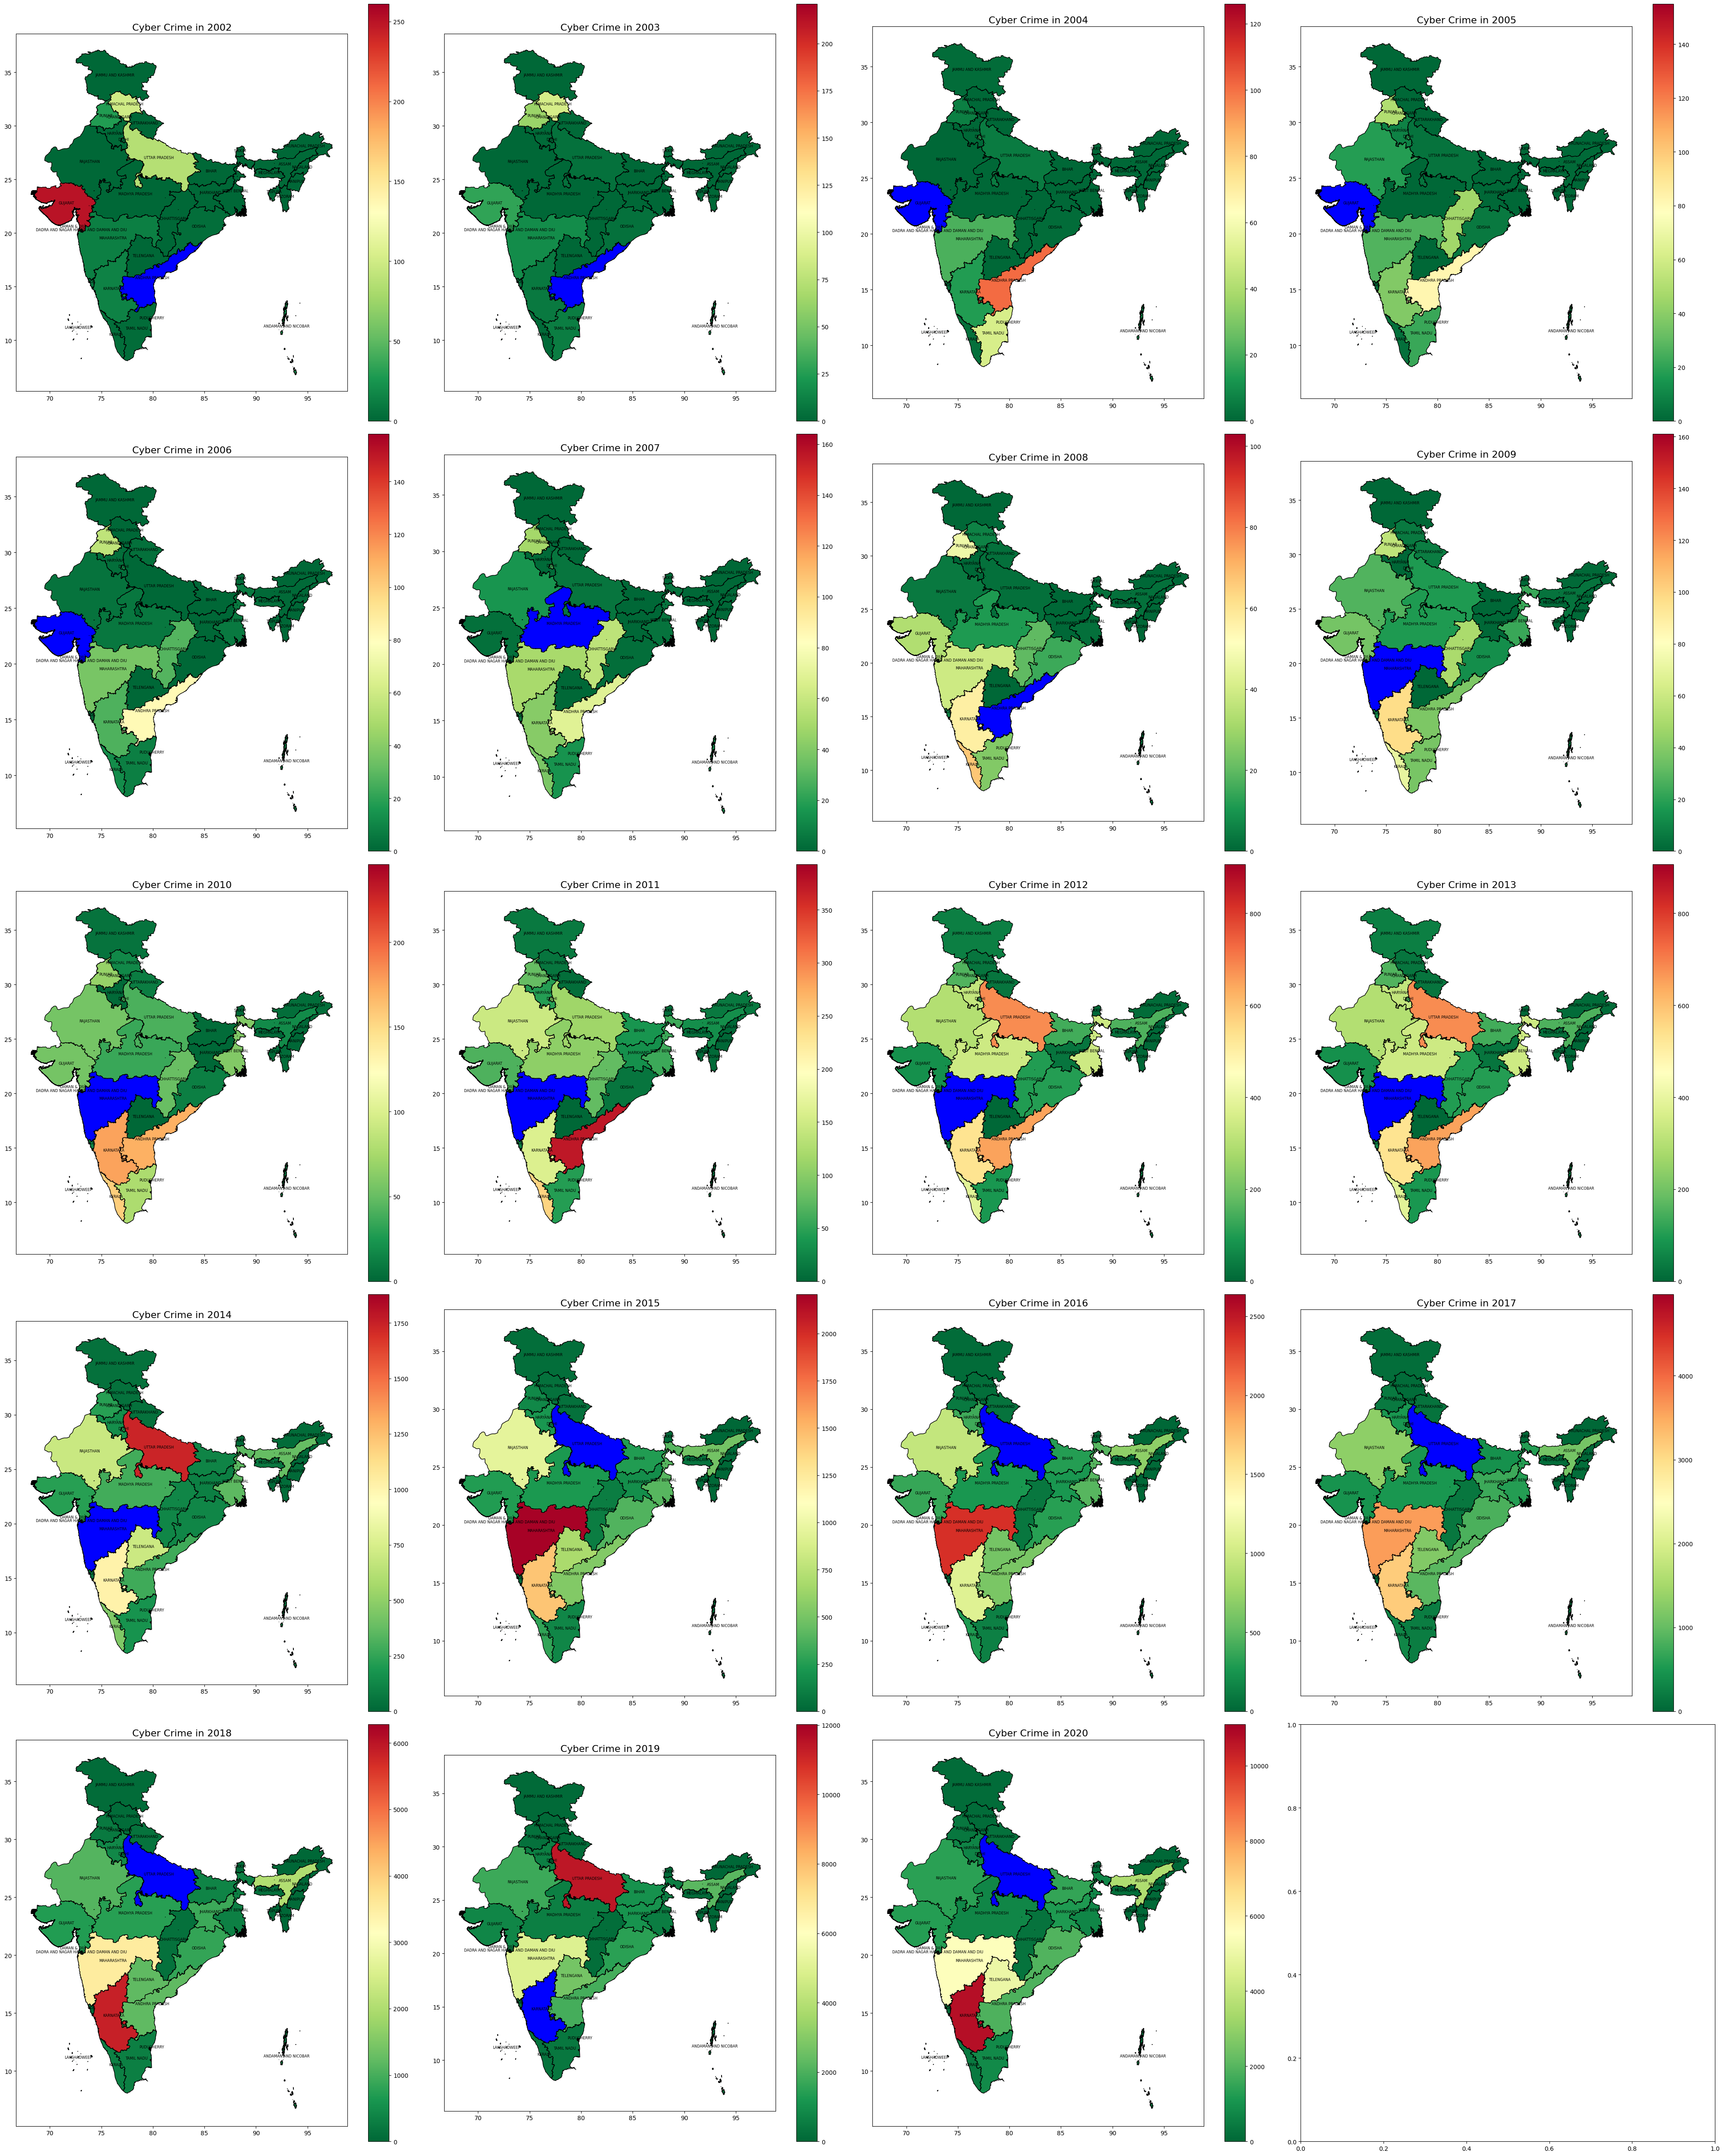

Highest cyber crime in 2002: ANDHRA PRADESH (261.0)
Highest cyber crime in 2003: ANDHRA PRADESH (221.0)
Highest cyber crime in 2004: GUJARAT (126.0)
Highest cyber crime in 2005: GUJARAT (155.0)
Highest cyber crime in 2006: GUJARAT (158.0)
Highest cyber crime in 2007: MADHYA PRADESH (164.0)
Highest cyber crime in 2008: ANDHRA PRADESH (103.0)
Highest cyber crime in 2009: MAHARASHTRA (161.0)
Highest cyber crime in 2010: MAHARASHTRA (246.0)
Highest cyber crime in 2011: MAHARASHTRA (393.0)
Highest cyber crime in 2012: MAHARASHTRA (907.0)
Highest cyber crime in 2013: MAHARASHTRA (907.0)
Highest cyber crime in 2014: MAHARASHTRA (1879.0)
Highest cyber crime in 2015: UTTAR PRADESH (2208.0)
Highest cyber crime in 2016: UTTAR PRADESH (2639.0)
Highest cyber crime in 2017: UTTAR PRADESH (4971.0)
Highest cyber crime in 2018: UTTAR PRADESH (6280)
Highest cyber crime in 2019: KARNATAKA (12020)
Highest cyber crime in 2020: UTTAR PRADESH (11097)


In [22]:
fig, axes = plt.subplots(5, 4, figsize=(40, 50))

for year in range(2002, 2021):

    y = (year - 2002) // 4
    x = (year - 2002) % 4

    ax = axes[y][x]
    ax.set_title("Cyber Crime in " + str(year), fontsize=16)

    # Choropleth map (Green → Red)
    gdf.plot(
        column=str(year),
        ax=ax,
        legend=True,
        cmap="RdYlGn_r",   # Green to Red
        edgecolor="black"
    )

    # Find highest state
    max_state = df[str(year)].idxmax()

    # Highlight highest state
    gdf[gdf.index == max_state].plot(
        ax=ax,
        color="blue",
        edgecolor="black"
    )

    # Add state labels
    for idx, row in gdf.iterrows():
        ax.text(
            row.geometry.centroid.x,
            row.geometry.centroid.y,
            idx,
            fontsize=6,
            ha='center'
        )

plt.tight_layout()
plt.show()

# -------------------------------
# Print Highest Crime State
# -------------------------------
for year in range(2002, 2021):
    max_state = df[str(year)].idxmax()
    max_value = df[str(year)].max()
    print(f"Highest cyber crime in {year}: {max_state} ({max_value})")